In [1]:
from numpy.random import randn
import hddm
import numpy as np
import matplotlib.pyplot as plt

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
print(hddm.__version__)

0.6.0


In [3]:
#50 trials per condition by default
data, params = hddm.generate.gen_rand_data(params={'easy': {'v': 1, 'a': 2, 't': .3},
                                                   'hard': {'v': 0.1, 'a': 2, 't': .3}}, 
                                           subjs=10, size=200)
#define a fake covariate which should have no 
#correlation with the decision parameter
data['fake_covariate'] = randn(len(data))

m_reg = hddm.HDDMRegressor(data, "v ~ fake_covariate:C(condition)")
m_reg.sample(20, burn=10,thin=5)

Adding these covariates:
['v_Intercept', 'v_fake_covariate:C(condition)[easy]', 'v_fake_covariate:C(condition)[hard]']
 [-----------------100%-----------------] 20 of 20 complete in 5.2 sec

In [4]:
m_reg.dic

10201.261193128148

Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_fake_covariate:C(condition, Treatment('easy'))[easy]
Plotting v_fake_covariate:C(condition, Treatment('easy'))[hard]


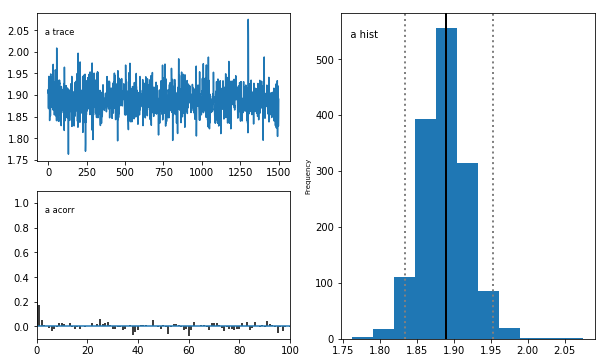

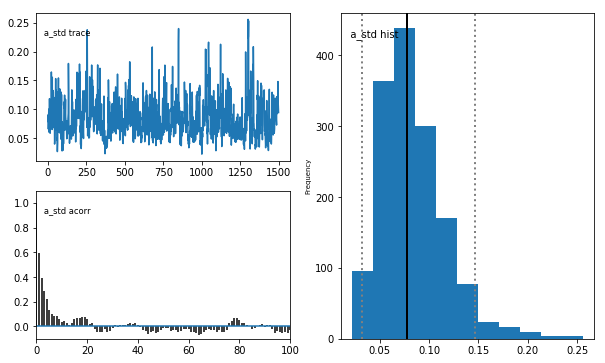

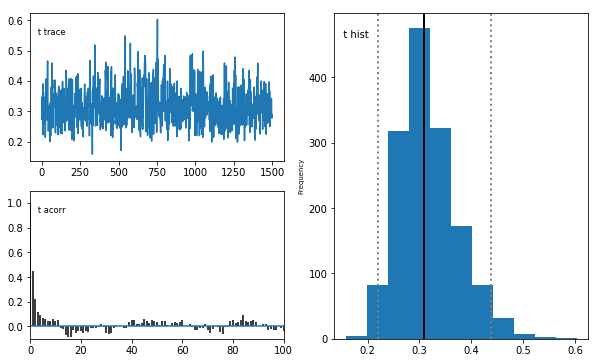

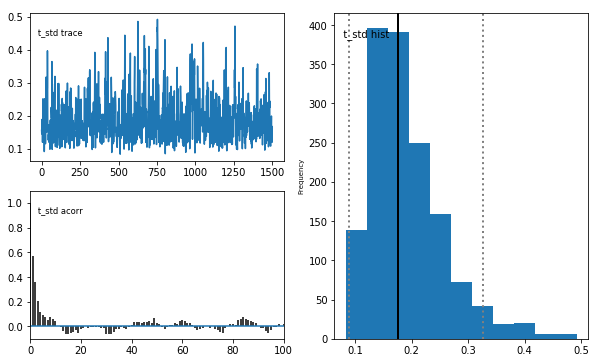

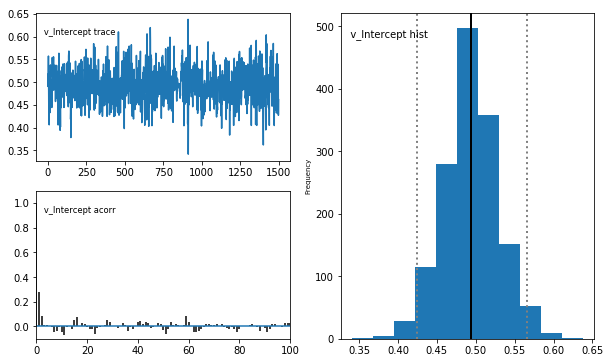

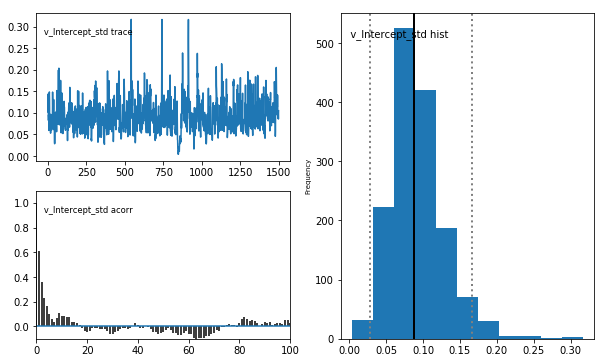

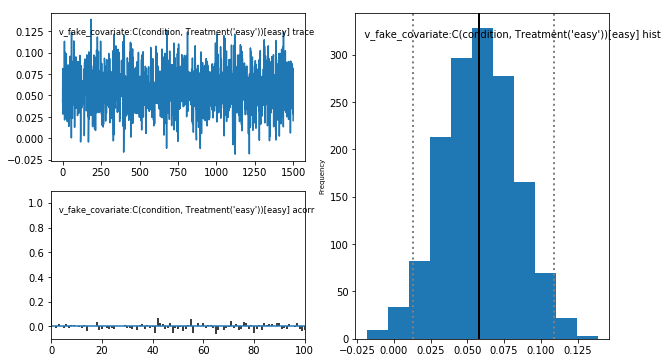

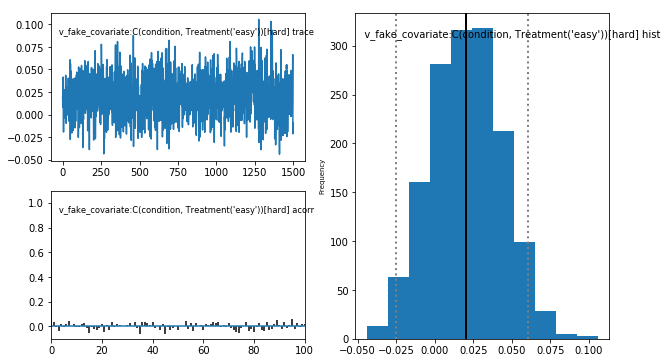

In [231]:
m_reg.plot_posteriors()

In [242]:
m_reg.gen_stats()

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.88842,0.0314639,1.82897,1.86752,1.8888,1.90697,1.9504,0.000952153
a_std,0.0839861,0.0328543,0.0383181,0.0611498,0.0780456,0.100804,0.164272,0.0017687
a_subj.0,1.79335,0.0448372,1.7058,1.76305,1.79322,1.8229,1.8826,0.00203932
a_subj.1,1.95188,0.041974,1.87469,1.92215,1.95001,1.97983,2.04196,0.00173343
a_subj.2,1.89959,0.0406522,1.82717,1.87057,1.89875,1.9257,1.98613,0.00128132
a_subj.3,1.81518,0.0428771,1.72131,1.78787,1.81567,1.84487,1.89729,0.00181264
a_subj.4,1.89856,0.0408272,1.81798,1.87137,1.89793,1.92506,1.98237,0.00137807
a_subj.5,1.90763,0.0406888,1.82961,1.87957,1.90648,1.9347,1.99339,0.00142951
a_subj.6,1.86661,0.0400919,1.78348,1.83982,1.86745,1.89431,1.94324,0.00139796
a_subj.7,1.84565,0.0395021,1.76535,1.82049,1.84784,1.87184,1.92076,0.00152863


In [233]:
data.head(), print(data.shape), data.groupby('condition').count()

(4000, 5)


(         rt  response  subj_idx condition  fake_covariate
 0  0.467288       1.0         0      easy        0.555025
 1  1.332288       1.0         0      easy        0.475213
 2  0.704288       1.0         0      easy       -2.533646
 3  0.922288       1.0         0      easy       -0.659850
 4  0.856288       1.0         0      easy        1.208839,
 None,
              rt  response  subj_idx  fake_covariate
 condition                                          
 easy       2000      2000      2000            2000
 hard       2000      2000      2000            2000)

In [235]:
#plot posteriors 
v_easy, v_hard = m_reg.nodes_db.ix[["v_fake_covariate:C(condition, Treatment('easy'))[easy]",
                                                  "v_fake_covariate:C(condition, Treatment('easy'))[hard]"],
                                                          'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5,1,'Posteriors of fake covariate:drift-rate effect')

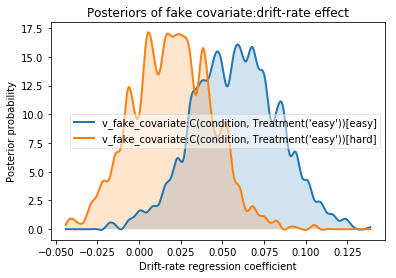

In [236]:
hddm.analyze.plot_posterior_nodes([v_easy, v_hard])
plt.xlabel('Drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of fake covariate:drift-rate effect')

In [237]:
#are the beta distributions significantly > or < 0? 
#no, ~9% of the distribution is less than 0 and ~91% greater than 0. 
print("P(v_fake_cov_easy < 0) = ", (v_easy.trace() < 0).mean())
print("P(v_fake_cov_easy > 0) = ", (v_easy.trace() > 0).mean())

P(v_fake_cov_easy < 0) =  0.01
P(v_fake_cov_easy > 0) =  0.99


In [238]:
#no, ~46% of the distribution is less than 0 and ~54% greater than 0. 
print("P(v_fake_cov_hard < 0) = ", (v_hard.trace() < 0).mean())
print("P(v_fake_cov_hard > 0) = ", (v_hard.trace() > 0).mean())

P(v_fake_cov_hard < 0) =  0.194
P(v_fake_cov_hard > 0) =  0.806


In [227]:
#what prop. of the beta distributions are significantly different from one another? 
#only ~84% of the easy distribution is greater than the hard dist.
print("P(v_fake_cov_easy > v_fake_cov_hard) = ", (v_easy.trace() > v_hard.trace()).mean())

P(v_fake_cov_easy > v_fake_cov_hard) =  0.0113333333333


In [178]:
ppc_data = hddm.utils.post_pred_gen(m_reg, append_data=True,samples=100)

 [--------------------------------------------------------------------------400%--------------------------------------------------------------------------] 4 of 1 complete in 58.8 sec

In [192]:
np.unique(m_reg.data.subj_idx)

array([0])

In [201]:
#using the sign of the reaction times, construct sampled accuracy
ppc_data['response_sampled'] = np.sign(ppc_data.rt_sampled) == 1

In [109]:
#before averaging, flip rts back to abs. val.
ppc_data.rt_sampled = abs(ppc_data.rt_sampled)
ppc_data.rt = abs(ppc_data.rt)

In [204]:
#get average and std of simulated and observed rt/acc 
mean_sim_real = ppc_data.groupby('condition').mean()
std_sim_real = ppc_data.groupby('condition').std()

,rt_sampled,index,rt,response,subj_idx,fake_covariate,response_sampled
condition,,,,,,,
easy,0.445831,24.5,0.86016,0.86,0.0,0.108369,0.6920
hard,0.461790,74.5,0.33768,0.54,0.0,0.146570,0.6834


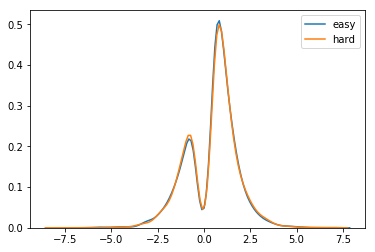

In [205]:
import seaborn as sns
sns.kdeplot(ppc_data.rt_sampled[ppc_data.condition == 'easy'], label='easy')
sns.kdeplot(ppc_data.rt_sampled[ppc_data.condition == 'hard'], label='hard')

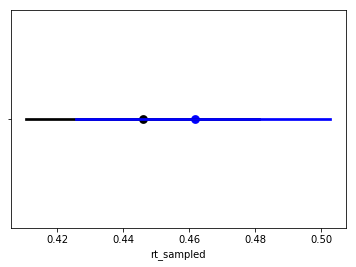

In [215]:
sns.pointplot(ppc_data.rt_sampled[ppc_data.condition == 'easy'], label='easy', color='k')
sns.pointplot(ppc_data.rt_sampled[ppc_data.condition == 'hard'], label='hard', color='b')

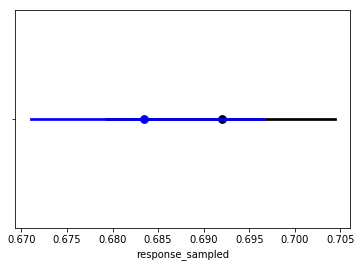

In [214]:
sns.pointplot( ppc_data.response_sampled[ppc_data.condition == 'easy'], label='easy', color='k')
sns.pointplot(ppc_data.response_sampled[ppc_data.condition == 'hard'], label='hard', color='b')

In [111]:
mean_sim_real

,rt_sampled,index,rt,response,subj_idx,fake_covariate,response_sampled
condition,,,,,,,
easy,1.138157,24.5,1.17908,0.96,0.0,0.108381,0.8218
hard,1.151616,74.5,1.09210,0.68,0.0,-0.145327,0.8006


In [46]:
std_sim_real

,rt_sampled,index,rt,response,subj_idx,fake_covariate,response_sampled
condition,,,,,,,
easy,0.620071,14.432313,0.699700,0.366643,0.0,1.166327,0.375319
hard,0.598175,14.432313,0.518859,0.384226,0.0,1.128662,0.379834
